In [42]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [43]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [44]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [45]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


데이터를 확인해보니 21개의 feature가 있는 모습을 볼 수 있습니다.  
하지만 date 칼럼에서 부가적인 정보가 더 붙어있는데  
date를 해석하기에는 필요없는 정보라고 생각합니다.  
그리고 가격을 예측하는 기준은 "월별"이 좋다고 생각하여 일자도 빼겠습니다.  
그래서 년도, 월을 제외한 나머지를 제거하도록 합니다.

## 데이터 전처리

### date 칼럼 처리

In [46]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


date가 좀 더 직관적으로 보입니다.  
예를 들어 201410이면 2014년 10월에 구입한 건물이겠죠?  

### price, id 칼럼 제거

In [47]:
y = train['price']
# del train['price']

우리의 목표는 가격을 '예측'하는 것 이기 때문에  
train에 있는 가격정보는 제외하도록 합니다.  

In [48]:
del train['id']

print(train.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


id도 학습을 하는데 필요없는 정보라고 생각하기 때문에 제외하겠습니다.  

In [49]:
train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### test 데이터에도 적용

ID와 Price가 제거된 모습을 볼 수 있습니다!

In [50]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)
del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


train 데이터를 변경했다면 test데이터에도 동일하게 적용을 해야 되겠죠?  
왜냐하면 비교를 해야되는 데이터는 동일해야 되기 때문입니다. 

In [51]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

y는 바로 우리가 학습해야될 price입니다.  
데이터 전처리를 할 때 우리는 train의 price를 y에 넣었습니다.  

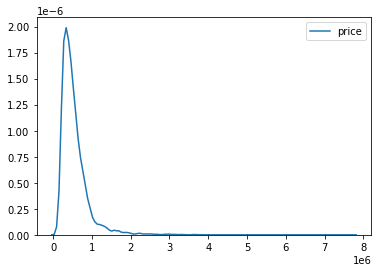

In [52]:
sns.kdeplot(y)
plt.show()

y의 분포를 확인해보겠습니다.  
그런데 그래프가 너무 한 쪽에 치우쳐 있어서 분석하기엔 조금 안좋은 모양을 보입니다.  
price 중에 평균에서 너무 벗어나 있는 '이상치'가 있기 때문입니다.  
그렇다면 어떻게 보기 좋은 그래프로 만들 수 있을까요?

In [53]:
y = np.log(y)
y

0        12.309982
1        12.100712
2        13.142166
3        12.458775
4        12.583995
           ...    
15030    13.322337
15031    13.822983
15032    12.793859
15033    12.899220
15034    12.691580
Name: price, Length: 15035, dtype: float64

그 방법은 바로 log를 취해주는 것입니다.  
log를 취하게 되면 0-10 정도의 범위에서는 급격한 변화를 이루고  
그 외의 100, 1000 ...에서는 완만한 곡선을 그리게 됩니다.  
즉, 이상치의 영향을 최소화 시키는 것이죠.

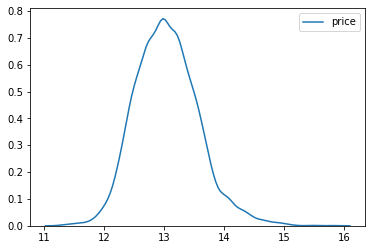

In [54]:
sns.kdeplot(y)
plt.show()

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   price          15035 non-null  float64
 2   bedrooms       15035 non-null  int64  
 3   bathrooms      15035 non-null  float64
 4   sqft_living    15035 non-null  int64  
 5   sqft_lot       15035 non-null  int64  
 6   floors         15035 non-null  float64
 7   waterfront     15035 non-null  int64  
 8   view           15035 non-null  int64  
 9   condition      15035 non-null  int64  
 10  grade          15035 non-null  int64  
 11  sqft_above     15035 non-null  int64  
 12  sqft_basement  15035 non-null  int64  
 13  yr_built       15035 non-null  int64  
 14  yr_renovated   15035 non-null  int64  
 15  zipcode        15035 non-null  int64  
 16  lat            15035 non-null  float64
 17  long           15035 non-null  float64
 18  sqft_l

Null 값이 없고 전처리가 잘된 데이터의 모습을 확인 할 수 있습니다.  
그렇다면 우리는 전처리가 잘 됐다는 가정하에 예측을 위한 모델을 설계할 일만 남았습니다.  

## 데이터 전처리 (추가)

### grade 확인

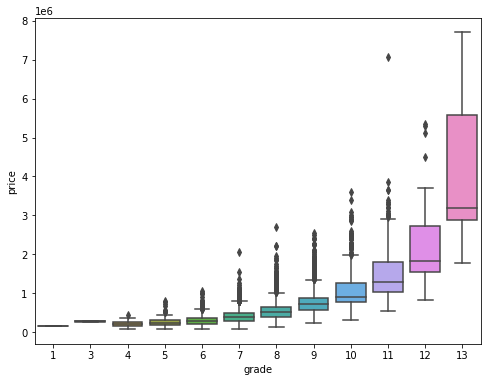

In [56]:
data = pd.concat([train['price'], train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

grade의 경우  "1-3은 건물 건축 및 디자인에 미치지 못하고 7은 평균 수준의 건축 및 디자인을, 11-13은 높은 수준의 건축 및 디자인을 지니고 있습니다." 라고 합니다.  
집의 등급이 높으면 가격이 높아집니다.  
하지만 이상한 경우가 있습니다.  
- 등급 3의 경우 값이 큰 이유
- 등급 7,8,9에서 이상치가 많은 이유
- 등급 8과 11에서 차이가 큰 이상치가 나타나는 이유  

위의 3가지는 좀 더 자세히 살펴봐야 합니다.

### sqft_living 확인

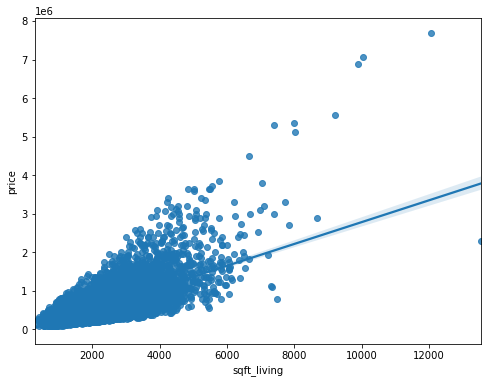

In [57]:
data = pd.concat([train['price'], train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living', y="price", data=data)

1sqlf는 0.0281평입니다. sqlf_lot는 부지 평방 피트인데, 흔히 우리나라의 경우,  
32평형 아파트는 일반적으로 실제로 쓰는 전용 면적은 25.7평 정도입니다.  
즉, sqlf_living은 실제 사용 면적 / sqlf_lot는 총 부지의 면적으로 생각하면 됩니다.  
하지만 가격이 14~15 사이에 sqft_living이 14000에 가까운 이상치가 있습니다. 

### bathrooms 확인

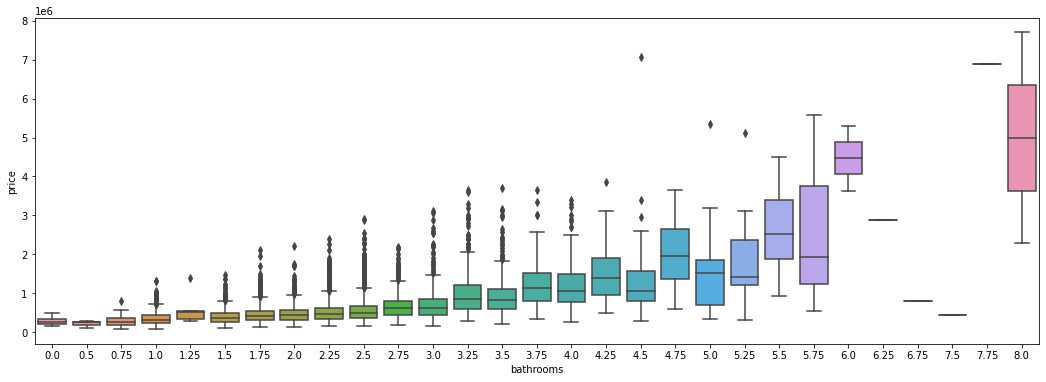

In [58]:
data = pd.concat([train['price'], train['bathrooms']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='bathrooms', y="price", data=data)

bathrooms같은경우 소숫점이 있어서 많이 헷갈릴 수 있습니다.   
각각의 값이 의미하는것은 아래와 같고 위의 값만을 가지고 각각의 값이 몇개있는지는 구분하기 힘들어 보입니다.  

- 0.5 : 세면대, 화장실
- 0.75 : 세면대, 화장실, 샤워실
- 1 : 세면대, 화장실, 샤워실, 욕조  

그래프를 보면 이상치가 있는 것을 확인할 수 있는데 아마 강남처럼 집은 좁지만 비싼 곳이 있기 때문일 것입니다.

### sqft_living 전처리

In [59]:
train.loc[train['sqft_living'] > 13000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8912,201405,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


위의 표를 보면 sqft_living이 13540으로 엄청 큰 값이 나온 것을 확인 할 수 있습니다.  
제거하도록 하겠습니다.

In [60]:
train = train.loc[train['sqft_living']!=13540]

### grade 전처리

In [63]:
train.loc[(y>12) & (train['grade'] == 3)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,201502,262000.0,1,0.75,520,12981,1.0,0,0,5,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4123,201411,280000.0,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549


가장 중요한 변수인 grade, sqft_ 모두 낮은 것을 볼 수 있습니다.   
그래서 두 값 모두 이상치로 규정하고 제거하도록 하겠습니다.

In [64]:
train.loc[(y>14.7) & (train['grade'] == 8)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7173,201408,2700000.0,5,4.0,4230,27295,2.0,1,4,3,8,3230,1000,1949,1985,98033,47.6803,-122.214,2660,27295


In [65]:
train.loc[(y>15.5) & (train['grade'] == 11)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,201406,7062500.0,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.65,-122.214,3930,25449


위의 3값 모두 특별한 이유가 없이 가격이 높아 보이므로 이상치로 규정하고 제거하도록 하겠습니다

In [66]:
train = train.drop([train.index[2302], train.index[4123],
                    train.index[7173], train.index[2775]])

In [67]:
y = train['price']
del train['price']

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           6468 non-null   int64  
 1   bedrooms       6468 non-null   int64  
 2   bathrooms      6468 non-null   float64
 3   sqft_living    6468 non-null   int64  
 4   sqft_lot       6468 non-null   int64  
 5   floors         6468 non-null   float64
 6   waterfront     6468 non-null   int64  
 7   view           6468 non-null   int64  
 8   condition      6468 non-null   int64  
 9   grade          6468 non-null   int64  
 10  sqft_above     6468 non-null   int64  
 11  sqft_basement  6468 non-null   int64  
 12  yr_built       6468 non-null   int64  
 13  yr_renovated   6468 non-null   int64  
 14  zipcode        6468 non-null   int64  
 15  lat            6468 non-null   float64
 16  long           6468 non-null   float64
 17  sqft_living15  6468 non-null   int64  
 18  sqft_lot

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15030 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15030 non-null  int64  
 1   bedrooms       15030 non-null  int64  
 2   bathrooms      15030 non-null  float64
 3   sqft_living    15030 non-null  int64  
 4   sqft_lot       15030 non-null  int64  
 5   floors         15030 non-null  float64
 6   waterfront     15030 non-null  int64  
 7   view           15030 non-null  int64  
 8   condition      15030 non-null  int64  
 9   grade          15030 non-null  int64  
 10  sqft_above     15030 non-null  int64  
 11  sqft_basement  15030 non-null  int64  
 12  yr_built       15030 non-null  int64  
 13  yr_renovated   15030 non-null  int64  
 14  zipcode        15030 non-null  int64  
 15  lat            15030 non-null  float64
 16  long           15030 non-null  float64
 17  sqft_living15  15030 non-null  int64  
 18  sqft_l

In [70]:
y = np.log(y)

## GridSearch

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import catboost
from catboost import Pool
from catboost import CatBoostRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [72]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=5)
    grid_model.fit(train, y)
    
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results

모델을 설계하기 전, 우리는 그 모델이 최적의 모델이기를 바라는 마음이 있습니다.  
그렇다면 최적의 모델은 어떻게 찾을 까요?  
그 방법은 좋은 하이퍼 파라미터를 찾는 것입니다.  
그래서 우리는 좋은 파라미터를 찾기 위한 방법을 사용할 것입니다.  
그 중에는 RandomSearch와 GridSearch 등이 있는데 이번에는 GridSearch를 사용해보겠습니다. 

### LGBMRegressor GridSearch

In [73]:
random_state = 2020
param_grid = {
    'objective':['regression'],
    'learning_rate' : [0.05],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 10, 20, 30, 40, 50],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    4.6s
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:   14.0s finished


,learning_rate,max_depth,n_estimators,objective,score,RMSLE
8,0.05,20,1000,regression,-0.025809,0.160651
14,0.05,40,1000,regression,-0.025809,0.160651
11,0.05,30,1000,regression,-0.025809,0.160651
17,0.05,50,1000,regression,-0.025809,0.160651
7,0.05,20,500,regression,-0.025818,0.160680
16,0.05,50,500,regression,-0.025818,0.160680
10,0.05,30,500,regression,-0.025818,0.160680
13,0.05,40,500,regression,-0.025818,0.160680
5,0.05,10,1000,regression,-0.025852,0.160786
4,0.05,10,500,regression,-0.025856,0.160797


GridSearch로 모델을 돌려보니 잘 정리가 된 표의 형태로 보입니다.  
RMSE를 기준으로 sort가 된 것이므로 제일 위에 있는 파라미터의 조합이  
가장 좋은 파라미터겠죠?  
모델에 사용하기 위해 기억해둡시다.  
다른 모델도 똑같이 돌려봅시다.  

### XGBRegressor GridSearch

In [74]:
param_grid = {
    'learning_rate': [0.05],
    'subsample': [0.9],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 5, 10, 20, 30, 40, 50],
}

model = XGBRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   20.3s
[Parallel(n_jobs=5)]: Done 105 out of 105 | elapsed:  2.5min finished


,learning_rate,max_depth,n_estimators,subsample,score,RMSLE
5,0.05,5,1000,0.9,-0.025568,0.159901
7,0.05,10,500,0.9,-0.025948,0.161083
8,0.05,10,1000,0.9,-0.026028,0.161331
4,0.05,5,500,0.9,-0.026131,0.161650
10,0.05,20,500,0.9,-0.027274,0.165150
11,0.05,20,1000,0.9,-0.027275,0.165150
17,0.05,40,1000,0.9,-0.027434,0.165632
16,0.05,40,500,0.9,-0.027434,0.165633
14,0.05,30,1000,0.9,-0.027440,0.165651
13,0.05,30,500,0.9,-0.027440,0.165652


### GradientBoostingRegressor GridSearch

In [75]:
param_grid = {
    'learning_rate': [0.05],
    'subsample': [0.9],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 5, 10]
}

model = GradientBoostingRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  2.4min finished


,learning_rate,max_depth,n_estimators,subsample,score,RMSLE
5,0.05,5,1000,0.9,-0.025989,0.161210
4,0.05,5,500,0.9,-0.026418,0.162537
7,0.05,10,500,0.9,-0.028515,0.168863
8,0.05,10,1000,0.9,-0.028524,0.168889
6,0.05,10,100,0.9,-0.029039,0.170409
3,0.05,5,100,0.9,-0.031373,0.177124
2,0.05,1,1000,0.9,-0.038480,0.196162
1,0.05,1,500,0.9,-0.043041,0.207464
0,0.05,1,100,0.9,-0.073661,0.271406


### RandomForestRegressor GridSearch

In [76]:
param_grid = {
    'n_estimators':[100,500,1000],
    'max_depth': [1, 5, 10, 20, 30, 40, 50],
}

model = RandomForestRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 105 out of 105 | elapsed:  9.1min finished


,max_depth,n_estimators,score,RMSLE
16,40,500,-0.031384,0.177154
19,50,500,-0.031385,0.177157
17,40,1000,-0.031386,0.177162
20,50,1000,-0.031387,0.177164
13,30,500,-0.031388,0.177168
14,30,1000,-0.031394,0.177184
10,20,500,-0.031400,0.177201
11,20,1000,-0.031410,0.177229
18,50,100,-0.031673,0.177969
15,40,100,-0.031674,0.177972


### CatBoost GridSearch

In [88]:
param_grid = {
    'learning_rate': [0.1],
    'n_estimators':[100,500,1000],
    'max_depth': [1, 5, 10, 20, 30, 40, 50]
}

model = CatBoostRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 105 out of 105 | elapsed:  1.8min finished


0:	learn: 11.7553337	total: 2.6ms	remaining: 2.59s
1:	learn: 10.5827065	total: 5.43ms	remaining: 2.71s
2:	learn: 9.5275801	total: 7ms	remaining: 2.33s
3:	learn: 8.5782088	total: 9.9ms	remaining: 2.46s
4:	learn: 7.7239869	total: 11.7ms	remaining: 2.34s
5:	learn: 6.9556220	total: 14.8ms	remaining: 2.45s
6:	learn: 6.2640810	total: 17ms	remaining: 2.42s
7:	learn: 5.6423670	total: 19.4ms	remaining: 2.4s
8:	learn: 5.0833020	total: 20.7ms	remaining: 2.28s
9:	learn: 4.5807168	total: 22ms	remaining: 2.18s
10:	learn: 4.1289743	total: 23.5ms	remaining: 2.11s
11:	learn: 3.7210481	total: 26.3ms	remaining: 2.17s
12:	learn: 3.3542646	total: 27.7ms	remaining: 2.11s
13:	learn: 3.0247771	total: 29.6ms	remaining: 2.08s
14:	learn: 2.7303527	total: 31.1ms	remaining: 2.04s
15:	learn: 2.4661402	total: 33.2ms	remaining: 2.04s
16:	learn: 2.2293514	total: 34.7ms	remaining: 2.01s
17:	learn: 2.0172048	total: 37.3ms	remaining: 2.04s
18:	learn: 1.8274175	total: 38.6ms	remaining: 1.99s
19:	learn: 1.6540696	total: 40

248:	learn: 0.2084946	total: 377ms	remaining: 1.14s
249:	learn: 0.2083895	total: 379ms	remaining: 1.14s
250:	learn: 0.2082638	total: 381ms	remaining: 1.14s
251:	learn: 0.2081742	total: 384ms	remaining: 1.14s
252:	learn: 0.2081710	total: 387ms	remaining: 1.14s
253:	learn: 0.2080935	total: 389ms	remaining: 1.14s
254:	learn: 0.2079754	total: 392ms	remaining: 1.14s
255:	learn: 0.2078917	total: 395ms	remaining: 1.15s
256:	learn: 0.2077663	total: 398ms	remaining: 1.15s
257:	learn: 0.2076440	total: 400ms	remaining: 1.15s
258:	learn: 0.2075540	total: 404ms	remaining: 1.16s
259:	learn: 0.2074544	total: 405ms	remaining: 1.15s
260:	learn: 0.2073910	total: 407ms	remaining: 1.15s
261:	learn: 0.2073539	total: 409ms	remaining: 1.15s
262:	learn: 0.2073485	total: 412ms	remaining: 1.15s
263:	learn: 0.2072768	total: 414ms	remaining: 1.15s
264:	learn: 0.2072759	total: 417ms	remaining: 1.16s
265:	learn: 0.2072639	total: 420ms	remaining: 1.16s
266:	learn: 0.2071993	total: 421ms	remaining: 1.16s
267:	learn: 

470:	learn: 0.1985640	total: 750ms	remaining: 843ms
471:	learn: 0.1985300	total: 753ms	remaining: 842ms
472:	learn: 0.1985265	total: 758ms	remaining: 845ms
473:	learn: 0.1985073	total: 760ms	remaining: 844ms
474:	learn: 0.1984678	total: 763ms	remaining: 844ms
475:	learn: 0.1984589	total: 765ms	remaining: 842ms
476:	learn: 0.1984243	total: 767ms	remaining: 840ms
477:	learn: 0.1984160	total: 768ms	remaining: 839ms
478:	learn: 0.1983851	total: 770ms	remaining: 837ms
479:	learn: 0.1983575	total: 771ms	remaining: 835ms
480:	learn: 0.1983571	total: 773ms	remaining: 834ms
481:	learn: 0.1983160	total: 774ms	remaining: 832ms
482:	learn: 0.1983111	total: 775ms	remaining: 830ms
483:	learn: 0.1983105	total: 777ms	remaining: 828ms
484:	learn: 0.1983065	total: 778ms	remaining: 827ms
485:	learn: 0.1982993	total: 780ms	remaining: 825ms
486:	learn: 0.1982722	total: 781ms	remaining: 823ms
487:	learn: 0.1982693	total: 783ms	remaining: 821ms
488:	learn: 0.1982449	total: 784ms	remaining: 819ms
489:	learn: 

697:	learn: 0.1940718	total: 1.12s	remaining: 485ms
698:	learn: 0.1940321	total: 1.12s	remaining: 484ms
699:	learn: 0.1940308	total: 1.13s	remaining: 483ms
700:	learn: 0.1940043	total: 1.13s	remaining: 482ms
701:	learn: 0.1940034	total: 1.13s	remaining: 480ms
702:	learn: 0.1939957	total: 1.13s	remaining: 479ms
703:	learn: 0.1939901	total: 1.14s	remaining: 478ms
704:	learn: 0.1939709	total: 1.14s	remaining: 478ms
705:	learn: 0.1939621	total: 1.14s	remaining: 476ms
706:	learn: 0.1939568	total: 1.14s	remaining: 474ms
707:	learn: 0.1939336	total: 1.15s	remaining: 473ms
708:	learn: 0.1939336	total: 1.15s	remaining: 471ms
709:	learn: 0.1939052	total: 1.15s	remaining: 469ms
710:	learn: 0.1938957	total: 1.15s	remaining: 467ms
711:	learn: 0.1938623	total: 1.15s	remaining: 466ms
712:	learn: 0.1938623	total: 1.15s	remaining: 464ms
713:	learn: 0.1938491	total: 1.15s	remaining: 462ms
714:	learn: 0.1938224	total: 1.16s	remaining: 461ms
715:	learn: 0.1937988	total: 1.16s	remaining: 459ms
716:	learn: 

916:	learn: 0.1912953	total: 1.49s	remaining: 135ms
917:	learn: 0.1912896	total: 1.5s	remaining: 134ms
918:	learn: 0.1912884	total: 1.5s	remaining: 132ms
919:	learn: 0.1912812	total: 1.5s	remaining: 131ms
920:	learn: 0.1912617	total: 1.51s	remaining: 129ms
921:	learn: 0.1912424	total: 1.51s	remaining: 128ms
922:	learn: 0.1912414	total: 1.51s	remaining: 126ms
923:	learn: 0.1912414	total: 1.51s	remaining: 124ms
924:	learn: 0.1912310	total: 1.51s	remaining: 123ms
925:	learn: 0.1912254	total: 1.52s	remaining: 121ms
926:	learn: 0.1912173	total: 1.52s	remaining: 120ms
927:	learn: 0.1911933	total: 1.52s	remaining: 118ms
928:	learn: 0.1911883	total: 1.52s	remaining: 116ms
929:	learn: 0.1911681	total: 1.52s	remaining: 115ms
930:	learn: 0.1911529	total: 1.52s	remaining: 113ms
931:	learn: 0.1911487	total: 1.52s	remaining: 111ms
932:	learn: 0.1911428	total: 1.53s	remaining: 110ms
933:	learn: 0.1911381	total: 1.53s	remaining: 108ms
934:	learn: 0.1911373	total: 1.53s	remaining: 106ms
935:	learn: 0.1

,learning_rate,max_depth,n_estimators,score,RMSLE
2,0.1,1,1000,-0.038505,0.196227
1,0.1,1,500,-0.041518,0.203760
5,0.1,5,1000,-0.042276,0.205612
4,0.1,5,500,-0.044005,0.209774
3,0.1,5,100,-0.054771,0.234032
0,0.1,1,100,-0.059488,0.243901
8,0.1,10,1000,-0.083628,0.289186
7,0.1,10,500,-0.088445,0.297397
6,0.1,10,100,-0.102189,0.319671
9,0.1,20,100,NaN,NaN


## Train

In [77]:
random_state = 2020

### 1차: LGBMRegressor

In [78]:

from itertools import product
import time

ts = time.time()

LGB_model = LGBMRegressor(
    max_depth=20, 
    n_estimators=1000, 
    learning_rate=0.05, 
    objective='regression', 
    random_state=random_state)

LGB_model.fit(train, y)
LGB_prediction = LGB_model.predict(test)
LGB_prediction = np.expm1(LGB_prediction)

time.time() - ts

1.6406629085540771

In [79]:
print(LGB_prediction)

[ 505176.06605728  494435.71662024 1304419.51540697 ...  480214.02794902
  332262.70932779  439668.07334965]


### 1차: XGBRegressor

In [80]:
ts = time.time()

XGB_model = XGBRegressor(
    max_depth=5, 
    n_estimators=1000, 
    learning_rate=0.05, 
    subsample=0.9, 
    random_state=random_state)

XGB_model.fit(train, y)
XGB_prediction = XGB_model.predict(test)
XGB_prediction = np.expm1(XGB_prediction)

time.time() - ts

3.7203567028045654

### 1차: GradientBoostingRegressor

In [81]:
ts = time.time()

GBR_model = GradientBoostingRegressor(
    max_depth=5, 
    n_estimators=1000, 
    learning_rate=0.05, 
    subsample=0.9, 
    random_state=random_state)

GBR_model.fit(train, y)
GBR_prediction = GBR_model.predict(test)
GBR_prediction = np.expm1(GBR_prediction)

time.time() - ts

32.91390252113342

### 1차: RandomForestRegressor

In [89]:
ts = time.time()

RFR_model = RandomForestRegressor(
    max_depth=40, 
    n_estimators=500, 
    random_state=random_state)

RFR_model.fit(train, y)
RFR_prediction = RFR_model.predict(test)
RFR_prediction = np.expm1(RFR_prediction)

time.time() - ts

41.57846021652222

### 1차: CatBoostRegressor

In [83]:
ts = time.time()

catboost_model = CatBoostRegressor(
    n_estimators=1000, 
    od_type='Iter',
    od_wait=25,
    max_depth=1,
    learning_rate=0.01
)

catboost_model.fit(train, y,verbose=True, early_stopping_rounds = 20)
cat_prediction = catboost_model.predict(test)
cat_prediction = np.expm1(cat_prediction)

time.time() - ts

0:	learn: 12.9280916	total: 27.6ms	remaining: 27.6s
1:	learn: 12.7990586	total: 31.8ms	remaining: 15.9s
2:	learn: 12.6713361	total: 36.1ms	remaining: 12s
3:	learn: 12.5448257	total: 39.2ms	remaining: 9.77s
4:	learn: 12.4196202	total: 42.5ms	remaining: 8.45s
5:	learn: 12.2956419	total: 45.5ms	remaining: 7.53s
6:	learn: 12.1729552	total: 49ms	remaining: 6.94s
7:	learn: 12.0514988	total: 51.4ms	remaining: 6.37s
8:	learn: 11.9312590	total: 54ms	remaining: 5.95s
9:	learn: 11.8121864	total: 55.9ms	remaining: 5.53s
10:	learn: 11.6943342	total: 57.7ms	remaining: 5.19s
11:	learn: 11.5776636	total: 59.8ms	remaining: 4.92s
12:	learn: 11.4621626	total: 62.4ms	remaining: 4.74s
13:	learn: 11.3478190	total: 64.3ms	remaining: 4.53s
14:	learn: 11.2346244	total: 66.4ms	remaining: 4.36s
15:	learn: 11.1225139	total: 69.3ms	remaining: 4.26s
16:	learn: 11.0115773	total: 72.7ms	remaining: 4.2s
17:	learn: 10.9017231	total: 75.7ms	remaining: 4.13s
18:	learn: 10.7929967	total: 78ms	remaining: 4.03s
19:	learn: 1

160:	learn: 2.6326526	total: 468ms	remaining: 2.44s
161:	learn: 2.6069332	total: 471ms	remaining: 2.44s
162:	learn: 2.5817521	total: 473ms	remaining: 2.43s
163:	learn: 2.5566786	total: 477ms	remaining: 2.43s
164:	learn: 2.5319507	total: 480ms	remaining: 2.43s
165:	learn: 2.5073891	total: 482ms	remaining: 2.42s
166:	learn: 2.4832138	total: 484ms	remaining: 2.41s
167:	learn: 2.4592463	total: 485ms	remaining: 2.4s
168:	learn: 2.4355811	total: 487ms	remaining: 2.39s
169:	learn: 2.4121063	total: 488ms	remaining: 2.38s
170:	learn: 2.3887459	total: 490ms	remaining: 2.38s
171:	learn: 2.3657228	total: 492ms	remaining: 2.37s
172:	learn: 2.3428882	total: 494ms	remaining: 2.36s
173:	learn: 2.3204077	total: 496ms	remaining: 2.35s
174:	learn: 2.2981690	total: 497ms	remaining: 2.34s
175:	learn: 2.2760159	total: 499ms	remaining: 2.33s
176:	learn: 2.2540539	total: 500ms	remaining: 2.33s
177:	learn: 2.2323171	total: 503ms	remaining: 2.32s
178:	learn: 2.2108555	total: 505ms	remaining: 2.31s
179:	learn: 2

330:	learn: 0.5889526	total: 806ms	remaining: 1.63s
331:	learn: 0.5848580	total: 808ms	remaining: 1.62s
332:	learn: 0.5808753	total: 812ms	remaining: 1.63s
333:	learn: 0.5769018	total: 815ms	remaining: 1.63s
334:	learn: 0.5729066	total: 819ms	remaining: 1.63s
335:	learn: 0.5690065	total: 821ms	remaining: 1.62s
336:	learn: 0.5651579	total: 822ms	remaining: 1.62s
337:	learn: 0.5612803	total: 824ms	remaining: 1.61s
338:	learn: 0.5574590	total: 826ms	remaining: 1.61s
339:	learn: 0.5537490	total: 827ms	remaining: 1.6s
340:	learn: 0.5500884	total: 828ms	remaining: 1.6s
341:	learn: 0.5464613	total: 830ms	remaining: 1.6s
342:	learn: 0.5428392	total: 831ms	remaining: 1.59s
343:	learn: 0.5392377	total: 833ms	remaining: 1.59s
344:	learn: 0.5357312	total: 836ms	remaining: 1.59s
345:	learn: 0.5322279	total: 838ms	remaining: 1.58s
346:	learn: 0.5288143	total: 839ms	remaining: 1.58s
347:	learn: 0.5254555	total: 840ms	remaining: 1.57s
348:	learn: 0.5220773	total: 842ms	remaining: 1.57s
349:	learn: 0.5

510:	learn: 0.3001876	total: 1.19s	remaining: 1.14s
511:	learn: 0.2997721	total: 1.2s	remaining: 1.14s
512:	learn: 0.2993676	total: 1.2s	remaining: 1.14s
513:	learn: 0.2989787	total: 1.2s	remaining: 1.14s
514:	learn: 0.2985687	total: 1.21s	remaining: 1.14s
515:	learn: 0.2981797	total: 1.21s	remaining: 1.13s
516:	learn: 0.2977805	total: 1.21s	remaining: 1.13s
517:	learn: 0.2974079	total: 1.21s	remaining: 1.13s
518:	learn: 0.2970326	total: 1.21s	remaining: 1.13s
519:	learn: 0.2966614	total: 1.22s	remaining: 1.12s
520:	learn: 0.2963118	total: 1.22s	remaining: 1.12s
521:	learn: 0.2959668	total: 1.22s	remaining: 1.12s
522:	learn: 0.2956273	total: 1.22s	remaining: 1.11s
523:	learn: 0.2952845	total: 1.23s	remaining: 1.11s
524:	learn: 0.2949178	total: 1.23s	remaining: 1.11s
525:	learn: 0.2945898	total: 1.23s	remaining: 1.11s
526:	learn: 0.2942874	total: 1.23s	remaining: 1.11s
527:	learn: 0.2939721	total: 1.24s	remaining: 1.1s
528:	learn: 0.2936550	total: 1.24s	remaining: 1.1s
529:	learn: 0.293

675:	learn: 0.2659452	total: 1.47s	remaining: 702ms
676:	learn: 0.2658232	total: 1.47s	remaining: 700ms
677:	learn: 0.2656940	total: 1.47s	remaining: 698ms
678:	learn: 0.2655661	total: 1.47s	remaining: 696ms
679:	learn: 0.2654406	total: 1.48s	remaining: 694ms
680:	learn: 0.2653346	total: 1.48s	remaining: 692ms
681:	learn: 0.2652109	total: 1.48s	remaining: 689ms
682:	learn: 0.2651055	total: 1.48s	remaining: 687ms
683:	learn: 0.2650110	total: 1.48s	remaining: 684ms
684:	learn: 0.2648863	total: 1.48s	remaining: 682ms
685:	learn: 0.2647961	total: 1.48s	remaining: 679ms
686:	learn: 0.2646752	total: 1.48s	remaining: 676ms
687:	learn: 0.2645733	total: 1.49s	remaining: 674ms
688:	learn: 0.2644933	total: 1.49s	remaining: 671ms
689:	learn: 0.2644148	total: 1.49s	remaining: 669ms
690:	learn: 0.2643163	total: 1.49s	remaining: 666ms
691:	learn: 0.2642209	total: 1.49s	remaining: 664ms
692:	learn: 0.2641449	total: 1.49s	remaining: 661ms
693:	learn: 0.2640228	total: 1.49s	remaining: 658ms
694:	learn: 

861:	learn: 0.2489343	total: 1.77s	remaining: 283ms
862:	learn: 0.2488647	total: 1.77s	remaining: 281ms
863:	learn: 0.2487821	total: 1.77s	remaining: 279ms
864:	learn: 0.2486967	total: 1.78s	remaining: 277ms
865:	learn: 0.2486107	total: 1.78s	remaining: 276ms
866:	learn: 0.2485302	total: 1.78s	remaining: 274ms
867:	learn: 0.2484806	total: 1.79s	remaining: 272ms
868:	learn: 0.2483994	total: 1.79s	remaining: 270ms
869:	learn: 0.2483252	total: 1.79s	remaining: 268ms
870:	learn: 0.2482765	total: 1.79s	remaining: 266ms
871:	learn: 0.2482016	total: 1.79s	remaining: 263ms
872:	learn: 0.2481526	total: 1.8s	remaining: 261ms
873:	learn: 0.2480746	total: 1.8s	remaining: 259ms
874:	learn: 0.2479911	total: 1.8s	remaining: 257ms
875:	learn: 0.2479179	total: 1.8s	remaining: 255ms
876:	learn: 0.2478707	total: 1.8s	remaining: 253ms
877:	learn: 0.2477975	total: 1.8s	remaining: 251ms
878:	learn: 0.2477345	total: 1.81s	remaining: 249ms
879:	learn: 0.2476701	total: 1.81s	remaining: 247ms
880:	learn: 0.2475

2.2398924827575684

In [84]:
cat_prediction

array([ 518700.50683843,  362449.78508485, 1301484.20161081, ...,
        470198.81033211,  391207.38405579,  427917.94690589])

In [93]:
prediction = 0.25* XGB_prediction + 0.25*LGB_prediction + 0.25*RFR_prediction +0.25*GBR_prediction#+0.2*cat_prediction

##  Submission

In [95]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)

submission['price'] = prediction

submission_csv_path = '{}/submission_{}.csv'.format(data_dir, 'LGB_XGB_GBR_RFR_CAT4')
submission.to_csv(submission_csv_path, index=False)

In [96]:
submission.head()

,id,price
0,15035,5.012571e+05
1,15036,4.870675e+05
2,15037,1.331310e+06
3,15038,3.029168e+05
4,15039,3.261492e+05


## 마무리

### LGB, XGB, RFR, GBR, CAT을 앙상블 한 경우

전처리는 그대로 두고 LGB, XGB, RFR, GBR, CAT 를 앙상블 할 경우  
Private Score = 118874.06182  
라는 결과가 나오게 됩니다.  
몇 번의 시도로 앙상블 모델을 변형해 봤지만, 예측결과가 눈에 띄게 좋아지진 않았습니다.  

### 전처리를 추가하고 CAT을 빼고 앙상블 한 경우

전처리에서 이상치를 제거하는 과정을 추가했습니다.  
그리고 CAT의 성능이 잘 나오지 않아 총 5개 중에서 CAT을 빼서 4개의 모델로 앙상블을 했습니다.  
그랬더니 Private Score = 112520.13850가 나오게 되었습니다.  

성능을 높이기가 생각보다 어렵다는 생각이 들었습니다.  
데이터 전처리를 꼼꼼히 하는 것이 얼마나 중요한지 알게 되었습니다.  
그리고 Grid Search는 시간을 너무 많이 잡아 먹었습니다.  
Random Search도 많이 걸릴 것 같다는 생각이 들었습니다.  
이번 데이터는 다른 데이터에 비해 많지 않았지만, 더 방대해질 경우 Grid Search는 불가능 하다고 생각이 듭니다.  
하이퍼 파라미터를 효율적으로 찾을 수 있는 방법을 고안해야겠다는 생각이 들었습니다. 